<a href="https://colab.research.google.com/github/Nahal-K-A/AI-ML/blob/main/LR_BHD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression using the best performance features of Boston housing data

mse = 13.803162570789567
r2 = 0.8117762104184237


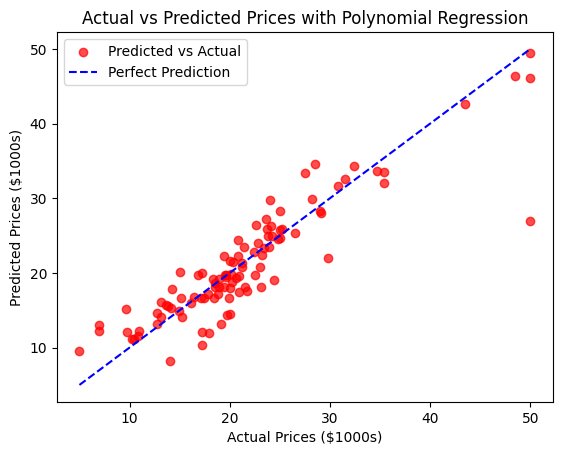

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler



# def predict_price(rm, zn, dis, ptratio, lstat):
#   """Predicts the price based on input feature values."""
#   input_data = pd.DataFrame({
#       "RM": [rm],
#       "ZN": [zn],
#       "DIS": [dis],
#       "PTRATIO": [ptratio],
#       "LSTAT": [lstat]
#   })
#   input_data_scaled = scaler.transform(input_data)
#   input_data_poly = poly.transform(input_data_scaled)
#   predicted_price = model.predict(input_data_poly)[0][0]
#   return predicted_price



bhd = pd.read_csv('housing.csv', header=None, sep='\s+')
bhd.columns=[
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD",
    "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

X = bhd[["RM", "ZN", "DIS", "PTRATIO", "LSTAT"]]  # Best features based on correlation and model performance
y=bhd[["MEDV"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

model = LR().fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

# for i in range(model.coef_.shape[1]):
#     print(f"w_{i + 1} = {model.coef_[0][i]}")
print(f"mse = {mean_squared_error(y_test, y_pred)}")
print(f"r2 = {r2_score(y_test, y_pred)}")
#print(bhd.corr()["MEDV"].sort_values(ascending=False)) #To check correletaion

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.7, label="Predicted vs Actual", color='red')
min_val = min(y_test.min().item(), y_pred.min().item())
max_val = max(y_test.max().item(), y_pred.max().item())
plt.plot([min_val, max_val], [min_val, max_val], linestyle="--", color="blue", label="Perfect Prediction")
plt.xlabel("Actual Prices ($1000s)")
plt.ylabel("Predicted Prices ($1000s)")
plt.title("Actual vs Predicted Prices with Polynomial Regression")
plt.legend()
plt.show(block=False)



# rm = float(input("Enter RM value: "))
# zn = float(input("Enter ZN value: "))
# dis = float(input("Enter DIS value: "))
# ptratio = float(input("Enter PTRATIO value: "))
# lstat = float(input("Enter LSTAT value: "))

# # Predict the price
# predicted_price = predict_price(rm, zn, dis, ptratio, lstat)

# # Display the predicted price
# print(f"Predicted price: ${predicted_price:.2f}")